In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [2]:
url= "https://raw.githubusercontent.com/amankharwal/Website-data/master/onlinefoods.csv"
data = pd.read_csv(url)
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [4]:
data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [5]:
import matplotlib.pyplot as plt 


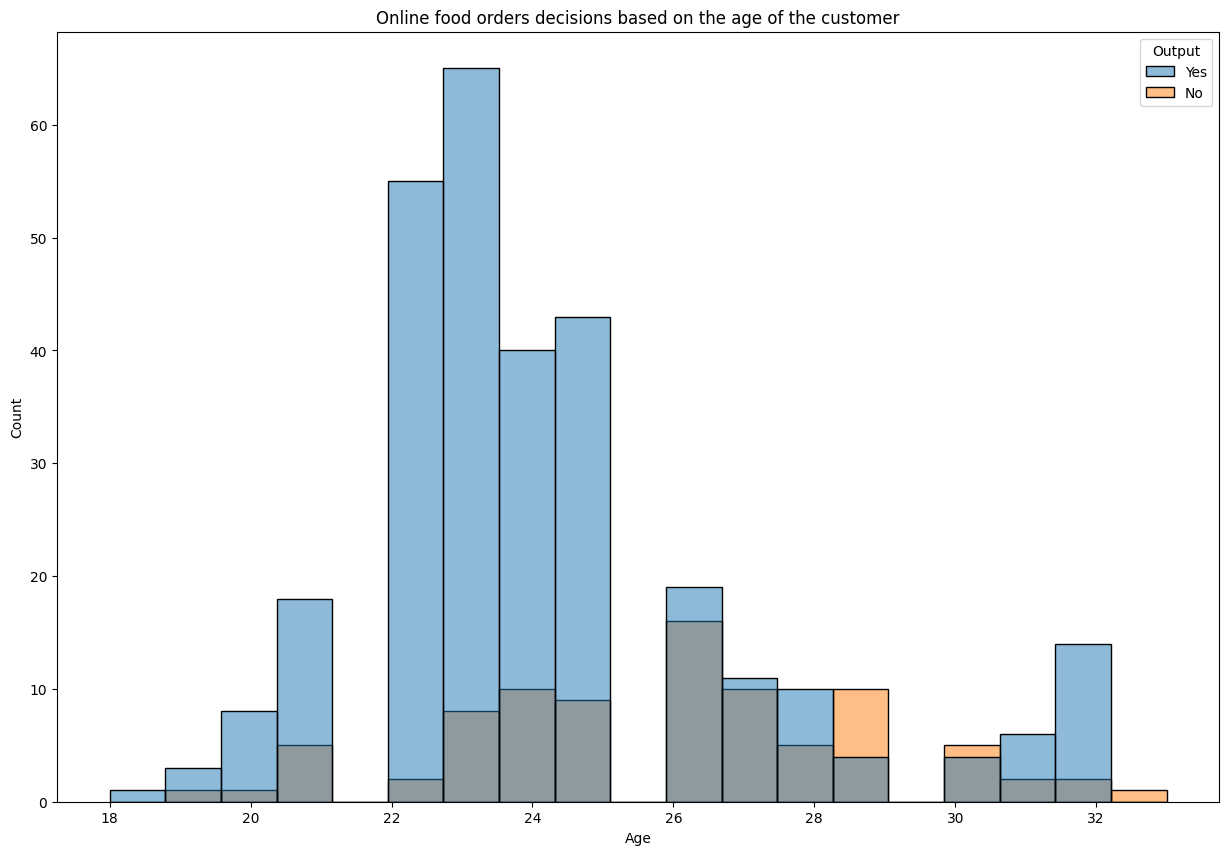

In [6]:
plt.figure(figsize=(15, 10))
plt.title("Online food orders decisions based on the age of the customer")
sns.histplot(x="Age",hue="Output",data=data)
plt.show()

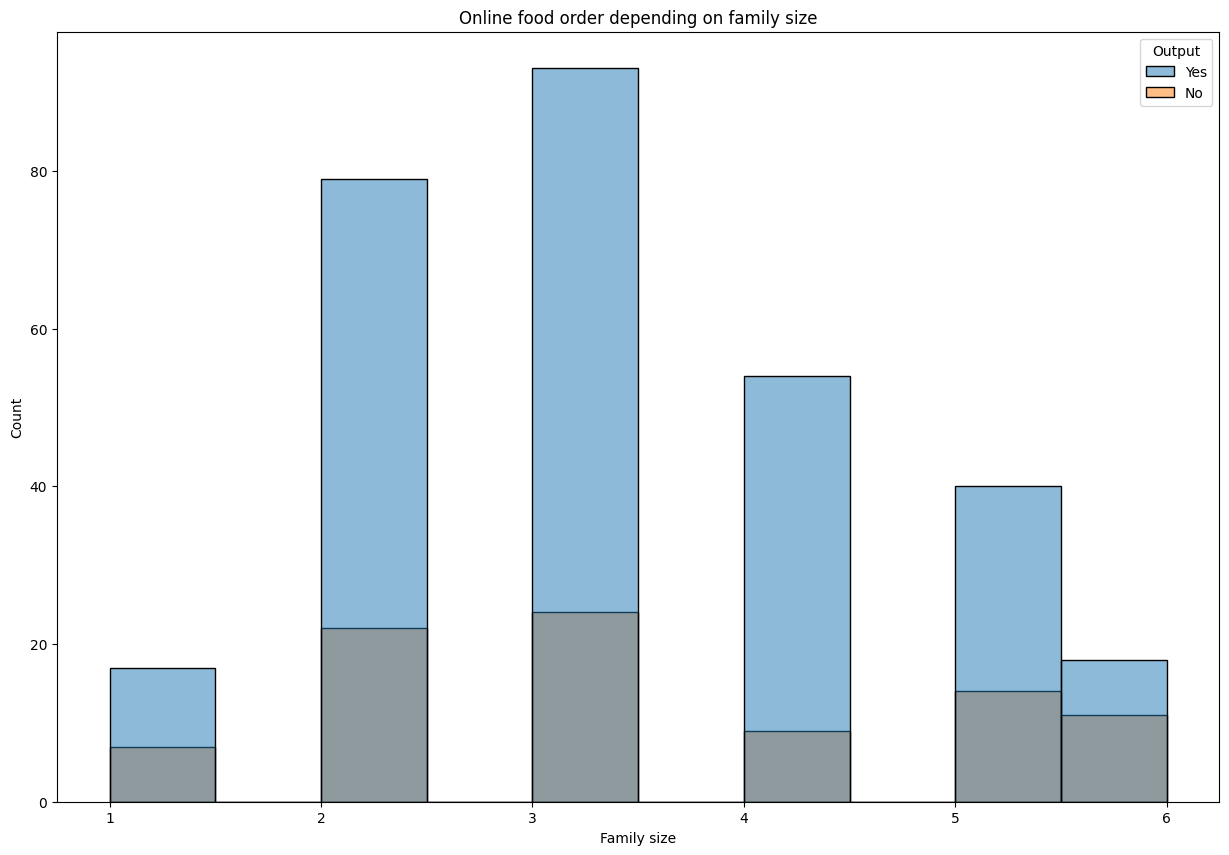

In [7]:
plt.figure(figsize=(15, 10))
plt.title("Online food order depending on family size")
sns.histplot(x= "Family size", hue="Output" ,data=data )
plt.show()

In this chart we can see that those custumber who has family size of 2,3,4 are the mail targets for the delivary companies 

In [8]:
buying_again_data=data.query("Output=='Yes'")
print(buying_again_data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [9]:
#Lets have look with gender who is ordering more food "Male;Female"

In [10]:
import plotly.graph_objects as go

# Assume buying_again_data DataFrame is already defined and has a 'Gender' column
gender = buying_again_data["Gender"].value_counts()
labels = gender.index
counts = gender.values
colors = ['Gold', 'lightgreen']

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=counts)])

# Update the layout of the pie chart
fig.update_layout(title_text="Who orders food online more: Male vs. Female")

# Update the trace (the pie chart itself)
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))

# Show the pie chart
fig.show()


# in this pie chart we can clearly see that mens are ordering more food than females

Let's check with maritial order 

In [11]:
import plotly.graph_objects as go

# Assume buying_again_data DataFrame is already defined and has a 'Marital Status' column
marital = buying_again_data["Marital Status"].value_counts()
labels = marital.index
counts = marital.values
colors = ['gold', 'lightgreen']

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=counts)])

# Update the layout of the pie chart
fig.update_layout(title_text='Who orders food online more: Married vs. Singles')

# Update the trace (the pie chart itself)
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))

# Show the pie chart
fig.show()


In this we can see that most singles order more often 

In [12]:
income=buying_again_data["Monthly Income"].value_counts()
labels=income.index
counts=income.values
colors=['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=labels, values=counts)])

# Update the layout of the pie chart
fig.update_layout(title_text='Which income group order food online more')

# Update the trace (the pie chart itself)
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))

# Show the pie chart
fig.show()

Now let’s prepare the data for the task of training a machine learning model. Here I will convert all the categorical features into numerical values:

In [13]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data["Marital Status"] = data["Marital Status"].map({"Married": 2, "Single": 1, "Prefer not to say": 0})
data["Occupation"] = data["Occupation"].map({"Student": 1, "Employee": 2, "Self Employeed": 3, "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, "Post Graduate": 2, "Ph.D": 3, "School": 4, "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0, "25001 to 50000": 50000, "More than 50000": 70000, "10001 to 25000": 25000, "Below Rs.10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative": 0})

Online Food Order Prediction Model
Now let’s train a machine learning model to predict whether a customer will order again or not. I will start by splitting the data into training and test sets:



In [14]:
#spliting data
from sklearn.model_selection import train_test_split
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation","Monthly Income", "Educational Qualifications","Family size", "Pin code", "Feedback"]])
y = np.array(data[["Output"]])

In [15]:
#training a machine learning model
from sklearn.ensemble import RandomForestClassifier
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.10,random_state=42)

In [16]:
model = RandomForestClassifier()
model.fit(xtrain,ytrain)
print(model.score(xtest,ytest))

0.8717948717948718


/Users/kartikgoswami/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [17]:
print("Enter Customer Details to Predict If the Customer Will Order Again")

try:
    a = int(input("Enter the Age of the Customer: "))
    b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
    c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 0 = Not Revealed): "))
    d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
    e = int(input("Monthly Income: "))
    f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
    g = int(input("Family Size: "))
    h = int(input("Pin Code: "))
    i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
    
    features = np.array([[a, b, c, d, e, f, g, h, i]])
    
    # Predict if the customer will order again
    prediction = model.predict(features)
    
    # Output the prediction
    print("Finding if the customer will order again: ", prediction[0])

except ValueError as ve:
    print("Invalid input, please enter numerical values for all inputs.")

except Exception as e:
    print(f"An error occurred: {e}")

Enter Customer Details to Predict If the Customer Will Order Again
Finding if the customer will order again:  Yes


In [18]:
import pickle

# Save the trained model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)



